In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from qutip.qip.circuit import gate_sequence_product

qutip.settings.has_mkl = False  # Fix the OS erros in VSCode


# Unitary Circuit

In [2]:
from sync_gates import unitary_circuit

In [3]:
dt = 0.1

detuning = 0.3
signal_strength = 0.2

In [4]:
qc = unitary_circuit(detuning, signal_strength, dt)

p = qc.propagators()
# Doesn't include the measurement or reset
D = gate_sequence_product(p)
D

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.99815063+0.05996101j  0.        +0.j          0.00999983+0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.99815063+0.05996101j  0.        +0.j
   0.00999983+0.j        ]
 [-0.00999983+0.j          0.        +0.j          0.99815063-0.05996101j
   0.        +0.j        ]
 [ 0.        +0.j         -0.00999983+0.j          0.        +0.j
   0.99815063-0.05996101j]]

## Simulation

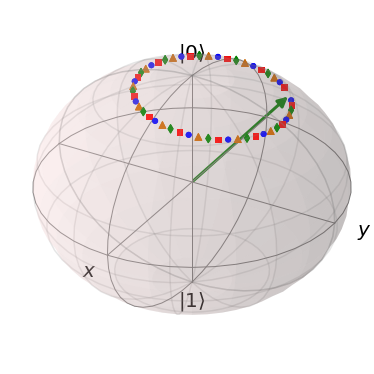

In [5]:
from sync_gates import run_simu

iq_state = (
    3 * np.exp(1j * 1) * basis(2, 0) 
    + np.exp(1j * -np.pi) * basis(2, 1)
).unit()
initial_state = tensor(iq_state, basis(2, 0))

b = Bloch()
b.add_states(initial_state.ptrace(0))

b.add_states([state.ptrace(0) for state in run_simu(qc, 50, initial_state)], kind="point")

b.show()


(<matplotlib.contour.QuadContourSet at 0x1df58e20100>,
 <Figure size 1080x360 with 3 Axes>,
 (<AxesSubplot:xlabel='$\\varphi$', ylabel='$\\theta$'>,
  <AxesSubplot:xlabel='$\\varphi$', ylabel='$S(\\varphi|\\hat\\rho)$'>))

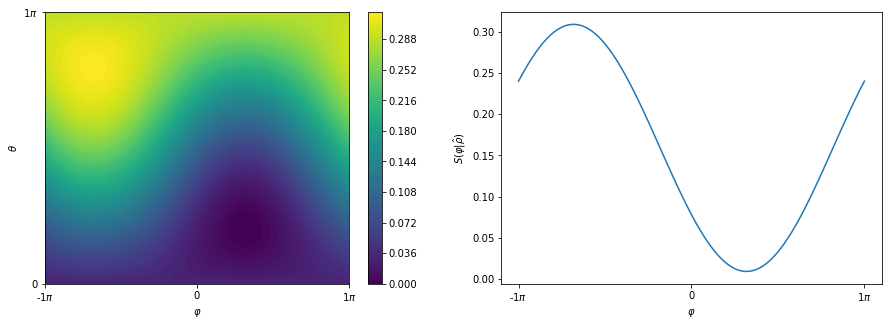

In [6]:
from sync_calcs import spin_husimi_qfunc, spin_S_measure
from sync_plots import plot_Q_and_S

# Plotting constants
n = 50  # angle array size scale

theta = np.linspace(0, np.pi, n)
phi = np.linspace(-np.pi, np.pi, 2 * n).reshape(-1, 1)  # 1D vector -> 2D column vector

Q = spin_husimi_qfunc(initial_state.ptrace(0), theta, phi, method="qutip")
S = spin_S_measure(theta, Q)

plot_Q_and_S(theta, phi, Q.T, S)

# Disipitive Circuit

In [7]:
from sync_gates import unitary_and_damping_circuit

In [8]:
dt = 0.1

detuning = 0.3
signal_strength = 0.2

# Gamma = 0.1
# theta_g = 2*np.arcsin(np.sqrt(0.1 * dt))
# theta_d = 2*np.arcsin(np.sqrt(1 * dt))

theta = .64

In [9]:
qc = unitary_and_damping_circuit(detuning, signal_strength, dt, theta)

p = qc.propagators()
# Doesn't include the measurement or reset
D = gate_sequence_product(p)
D

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.99815063+0.05996101j  0.        +0.j          0.00999983+0.j
   0.        +0.j        ]
 [-0.00314561+0.j         -0.0094922 +0.j          0.31398481-0.01886173j
   0.94747993-0.05691711j]
 [-0.0094922 +0.j          0.00314561+0.j          0.94747993-0.05691711j
  -0.31398481+0.01886173j]
 [ 0.        +0.j          0.99815063+0.05996101j  0.        +0.j
   0.00999983+0.j        ]]

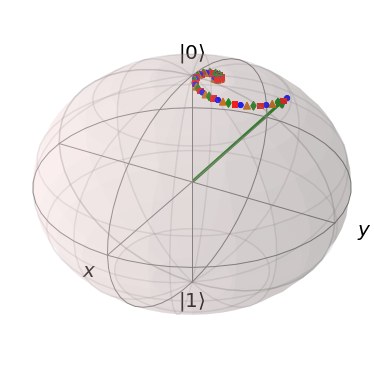

In [10]:
from sync_gates import run_simu

iq_state = (
    3 * np.exp(1j * 1) * basis(2, 0) 
    + np.exp(1j * -np.pi) * basis(2, 1)
).unit()
initial_state = tensor(iq_state, basis(2, 0))

b = Bloch()
b.add_states(initial_state.ptrace(0))

b.add_states([state.ptrace(0) for state in run_simu(qc, 100, initial_state)], kind="point")

b.show()


(<matplotlib.contour.QuadContourSet at 0x1df594f1580>,
 <Figure size 1080x360 with 3 Axes>,
 (<AxesSubplot:xlabel='$\\varphi$', ylabel='$\\theta$'>,
  <AxesSubplot:xlabel='$\\varphi$', ylabel='$S(\\varphi|\\hat\\rho)$'>))

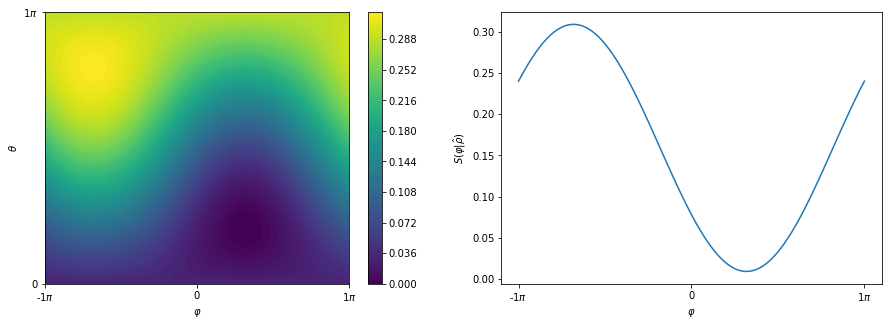

In [11]:
from sync_calcs import spin_husimi_qfunc, spin_S_measure
from sync_plots import plot_Q_and_S

# Plotting constants
n = 50  # angle array size scale

theta = np.linspace(0, np.pi, n)
phi = np.linspace(-np.pi, np.pi, 2 * n).reshape(-1, 1)  # 1D vector -> 2D column vector

Q = spin_husimi_qfunc(initial_state.ptrace(0), theta, phi, method="qutip")
S = spin_S_measure(theta, Q)

plot_Q_and_S(theta, phi, Q.T, S)